In [1]:
from data_loader import load_latest_iteration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mode = "soft"
FOLDER = f"../demo/cpp/hard/build/src/vtk_output_{mode}/data"

data = load_latest_iteration(FOLDER)

In [3]:
particles = data["particles"]

In [4]:
particles.describe()

,gid,quaternion_x,quaternion_y,quaternion_z,quaternion_w,orientation_x,orientation_y,orientation_z,lengths_x,lengths_y,...,velocity_linear_x,velocity_linear_y,velocity_linear_z,velocity_angular_x,velocity_angular_y,velocity_angular_z,rank,x,y,z
count,5937.000000,5937.000000,5937.0,5937.0,5937.000000,5937.000000,5937.000000,5937.0,5937.000000,5937.0,...,5937.000000,5937.000000,5937.0,5937.0,5937.0,5937.000000,5937.000000,5937.000000,5937.000000,5937.0
mean,3194.492842,-0.009364,0.0,0.0,0.010766,0.005905,-0.000305,0.0,1.339559,0.5,...,0.000083,-0.000004,0.0,0.0,0.0,-0.000671,7.019370,1.232140,-0.027512,0.0
std,1718.463838,0.709189,0.0,0.0,0.704993,0.730355,0.683165,0.0,0.271611,0.0,...,0.021447,0.020993,0.0,0.0,0.0,0.139401,3.876652,15.664866,16.132026,0.0
min,0.000000,-1.000000,0.0,0.0,-1.000000,-1.000000,-1.000000,0.0,1.000270,0.5,...,-0.220362,-0.201680,0.0,0.0,0.0,-0.570938,0.000000,-34.046000,-33.115500,0.0
25%,1713.000000,-0.730202,0.0,0.0,-0.691212,-0.749369,-0.664195,0.0,1.119530,0.5,...,-0.007404,-0.008331,0.0,0.0,0.0,-0.065802,4.000000,-11.112500,-12.761800,0.0
50%,3197.000000,-0.021625,0.0,0.0,0.017175,0.016102,-0.010873,0.0,1.251710,0.5,...,0.000142,-0.000172,0.0,0.0,0.0,-0.000020,7.000000,0.984503,-0.057399,0.0
75%,4681.000000,0.695745,0.0,0.0,0.707167,0.753868,0.656715,0.0,1.523250,0.5,...,0.007777,0.007981,0.0,0.0,0.0,0.065584,9.000000,13.499000,12.614000,0.0
max,6165.000000,1.000000,0.0,0.0,1.000000,0.999999,1.000000,0.0,2.000000,0.5,...,0.302687,0.157104,0.0,0.0,0.0,0.721406,15.000000,34.079200,33.200800,0.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import wavelength

/home/manuel/MicrobeGrowthSim-IDP/analysis/wavelength.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_length = particles.groupby("bin")["lengths_x"].mean()


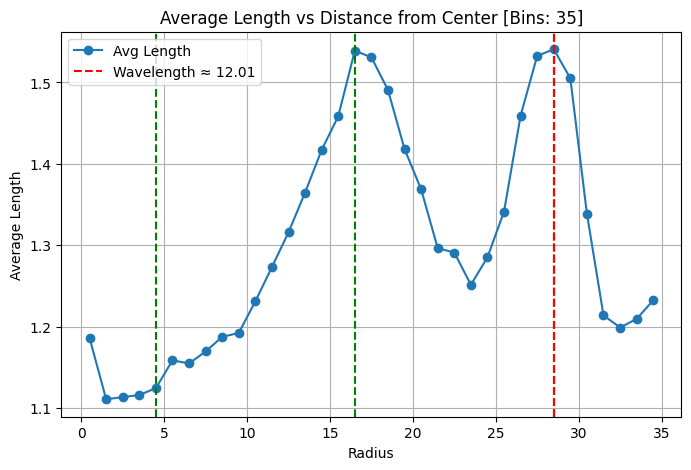

In [ ]:
bin_centers, avg_length, wavelength_fft = wavelength.find_wavelength_from_data(
    particles)

plt.figure(figsize=(8, 5))
plt.plot(bin_centers, avg_length, "o-", label="Avg Length")
plt.xlabel("Radius")
plt.ylabel("Average Length")
plt.title(f"Average Length vs Distance from Center [Bins: {bin_centers.size}]")
plt.grid(True)

# place vertical lines at multiples of wavelength
first_peak = bin_centers[np.argmax(avg_length)]
max_radius = bin_centers.max()

for direction, color in [(+1, "r"), (-1, "g")]:
    current = first_peak
    while 0 < current < max_radius:
        plt.axvline(current, color=color, linestyle="--")
        current += direction * wavelength_fft

# add one legend entry for wavelength
plt.axvline(first_peak, color="r", linestyle="--",
            label=f"Wavelength ≈ {wavelength_fft:.2f}")

plt.legend()
plt.show()